# Car  Price Prediction

The dataset used in this analysis contains information about car prices and their associated features. Here's a brief overview of the dataset:

Columns: The dataset consists of several columns including:

* Make: The brand or manufacturer of the car (e.g., Toyota, Honda, Ford).
* Model: The specific model of the car (e.g., Camry, Civic, F-150).
* Year: The manufacturing year of the car.
* Mileage: The total mileage (in miles) of the car.
* Condition: The condition of the car, categorized as Excellent, Good, or Fair.
* Price: The price of the car.
* Size: The dataset contains a certain number of rows, each representing a unique car entry, and a set of columns describing various attributes of the cars.

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('CarPricesPrediction.csv')
data.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


## 2. Data Cleaning

In [3]:
df = data.drop('Unnamed: 0', axis=1)
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
# Checking for missing data
df.isnull().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

There are no missing values 

In [5]:
# Checking for duplicate entries
df.duplicated().sum()

0

There are no duplicate entries

In [6]:
# Checking if the data types are correct
df.dtypes

Make          object
Model         object
Year           int64
Mileage        int64
Condition     object
Price        float64
dtype: object

## 3. Exploratory Data Analysis 

In [7]:
df.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


<AxesSubplot:>

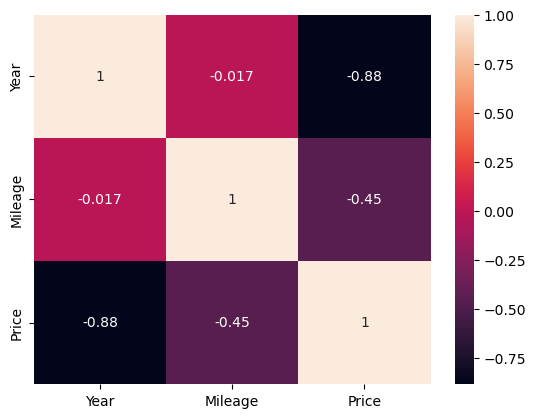

In [8]:
sns.heatmap(df.corr(), annot=True)

Observations:
* Strong negative correlation between price and year. Which makes sense as older models of cars are bound to cost less year on year
* Negative correlation between price and milage. As the milage increases there is wear and tear and the value depreciates

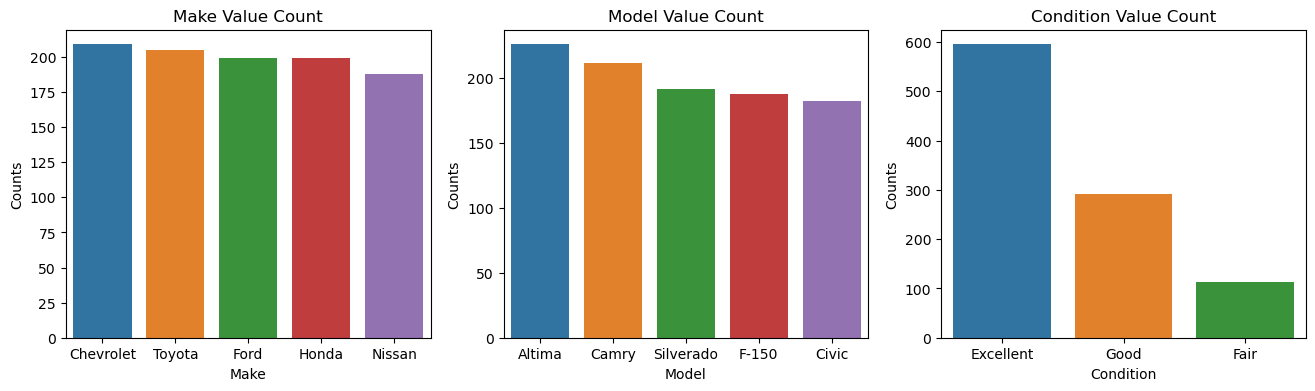

In [9]:
# Creating Barplots of Categorical Column value counts
cat_col = [col for col in df.columns if df[col].dtype=='object']

fig, axs = plt.subplots(1,3, figsize=(16,4))
axs = axs.flatten()

for i, col in enumerate(cat_col):
    df_cat = df[col].value_counts().reset_index()
    df_cat.columns = [col, 'Counts']
    sns.barplot(data=df_cat, x=col, y='Counts', ax=axs[i])
    axs[i].set_title(f'{col} Value Count')

plt.show()

In [10]:
df_make = df.groupby(['Make'])['Price'].mean()
df_make

Make
Chevrolet    21957.203589
Ford         22354.415578
Honda        22238.084171
Nissan       22587.502128
Toyota       21881.913415
Name: Price, dtype: float64

In [11]:
df_con = df.groupby(['Condition'])['Price'].mean()
df_con

Condition
Excellent    22150.842017
Fair         22357.820796
Good         22222.674315
Name: Price, dtype: float64

## 4. Normalizing, Encoding and Splitting data 

In [12]:
# Encoding for 'Condition' column
condition_map = {'Excellent': 2,
                 'Good': 1,
                 'Fair': 0}

df['Condition'] = df['Condition'].map(condition_map)
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,2,19094.75
1,Toyota,Silverado,2014,13578,2,27321.10
2,Chevrolet,Civic,2016,46054,1,23697.30
3,Ford,Civic,2022,34981,2,18251.05
4,Chevrolet,Civic,2019,63565,2,19821.85


In [13]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Make', 'Model']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the transformed DataFrame
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,1,4,2022,18107,2,19094.75
1,4,4,2014,13578,2,27321.10
2,0,2,2016,46054,1,23697.30
3,1,2,2022,34981,2,18251.05
4,0,2,2019,63565,2,19821.85


In [14]:
# Choosing features and target
y = df['Price']
X = df.drop('Price', axis=1)
print(y.shape)
print(X.shape)


(1000,)
(1000, 5)


In [15]:
from sklearn.model_selection import train_test_split

#Splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Shape for X_train', X_train.shape)
print('Shape for X_train', X_test.shape)
print('Shape for X_train', y_train.shape)
print('Shape for X_train', y_test.shape)

Shape for X_train (800, 5)
Shape for X_train (200, 5)
Shape for X_train (800,)
Shape for X_train (200,)


In [16]:
#scaling the data
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 5. Model Development

### 1. SVR

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train, y_train)

SVR()

In [19]:
svr_pred = svr_reg.predict(X_test)

In [20]:
svr_mse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 =r2_score(y_test, svr_pred)

### 2. XGBoost

In [21]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [22]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
xgb_pred = xgb_reg.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = np.sqrt(mean_squared_error(y_test, xgb_pred))

### 3. Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
tree_pred = tree_reg.predict(X_test)
tree_r2 = r2_score(y_test, tree_pred)
tree_mse = np.sqrt(mean_squared_error(y_test, tree_pred))

## 6. Model Evaluation

In [26]:
scores = {'Support Vector Regressor': [svr_r2, svr_mse], 'XGBRegressor':[xgb_r2, xgb_mse], 'Decision Tree Regressor':[tree_r2, tree_mse]}
df_scores = pd.DataFrame.from_dict(scores, orient='index', columns=['R2 score', 'Mean Square Error'])
df_scores

,R2 score,Mean Square Error
Support Vector Regressor,0.020809,4102.521966
XGBRegressor,0.998876,138.983550
Decision Tree Regressor,0.998457,162.837381


<AxesSubplot:xlabel='Mean Square Error'>

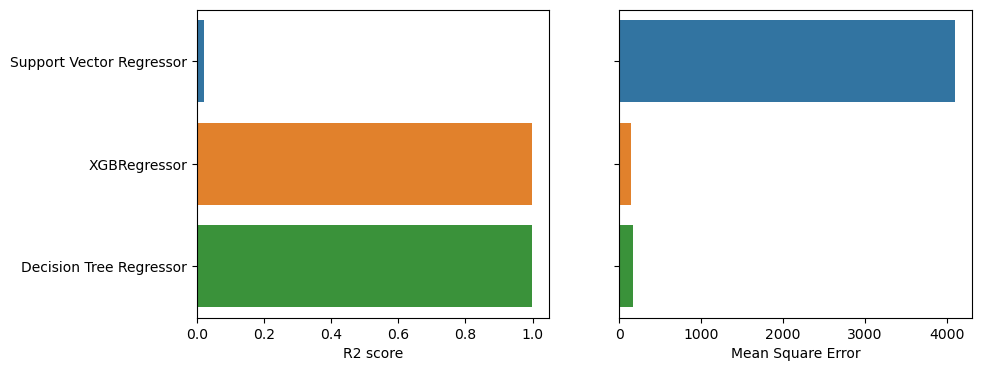

In [27]:
fig, axs = plt.subplots(1,2, figsize=(10,4), sharey=True)

sns.barplot(data=df_scores, x='R2 score', y=df_scores.index, orient='h', ax=axs[0])
sns.barplot(data=df_scores, x='Mean Square Error', y=df_scores.index, orient='h', ax=axs[1])



Conclusion:
* The logic is the higher the closer to 1 the r2 score is the better and the lower the mse is the better
* XGBRegressor Performed the best with a better r2_score and mse value than the rest
* SVR performed the worst, the model is not usable

## Author
Nokutenda Saungweme